## intro

In [1]:
!pip install yfinance requests bs4 plotly

Defaulting to user installation because normal site-packages is not writeable


## Tesla Stock Data using yfinance

In [2]:
import yfinance as yf
dat=yf.Ticker('TSLA')

Tesla_dat=dat.history(period="max")
Tesla_dat.reset_index(inplace=True)
Tesla_dat.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Extract Tesla Revenue Data using web scraping


In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table", class_="historical_data_table")
annual_table = tables[0]

revenue_data = []
for row in annual_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')
        if revenue and revenue != '-':
            revenue_data.append({"Date": date, "Revenue": float(revenue)})

Tesla_revenue= pd.DataFrame(revenue_data)
print(Tesla_revenue.tail())


    Date  Revenue
11  2013   2013.0
12  2012    413.0
13  2011    204.0
14  2010    117.0
15  2009    112.0


## Gamestop Stock Data using yfinance

In [37]:
import yfinance as yf
dat=yf.Ticker('GME')

Gamestop_dat=dat.history(period="max")
Gamestop_dat.reset_index(inplace=True)
Gamestop_dat.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Extracting GameStop Revenue Data Using Webscraping

In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table", class_="historical_data_table")
annual_table = tables[0]

revenue_data = []
for row in annual_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')
        if revenue and revenue != '-':
            revenue_data.append({"Date": date, "Revenue": float(revenue)})

Gamestop_revenue = pd.DataFrame(revenue_data)
print(Gamestop_revenue.tail())


    Date  Revenue
12  2013   8887.0
13  2012   9551.0
14  2011   9474.0
15  2010   9078.0
16  2009   8806.0


## Graph Code

In [44]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Tesla Stock and Revenue Dashboard

C:\Users\haste\AppData\Local\Temp\ipykernel_14164\3899174361.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\haste\AppData\Local\Temp\ipykernel_14164\3899174361.py:7: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



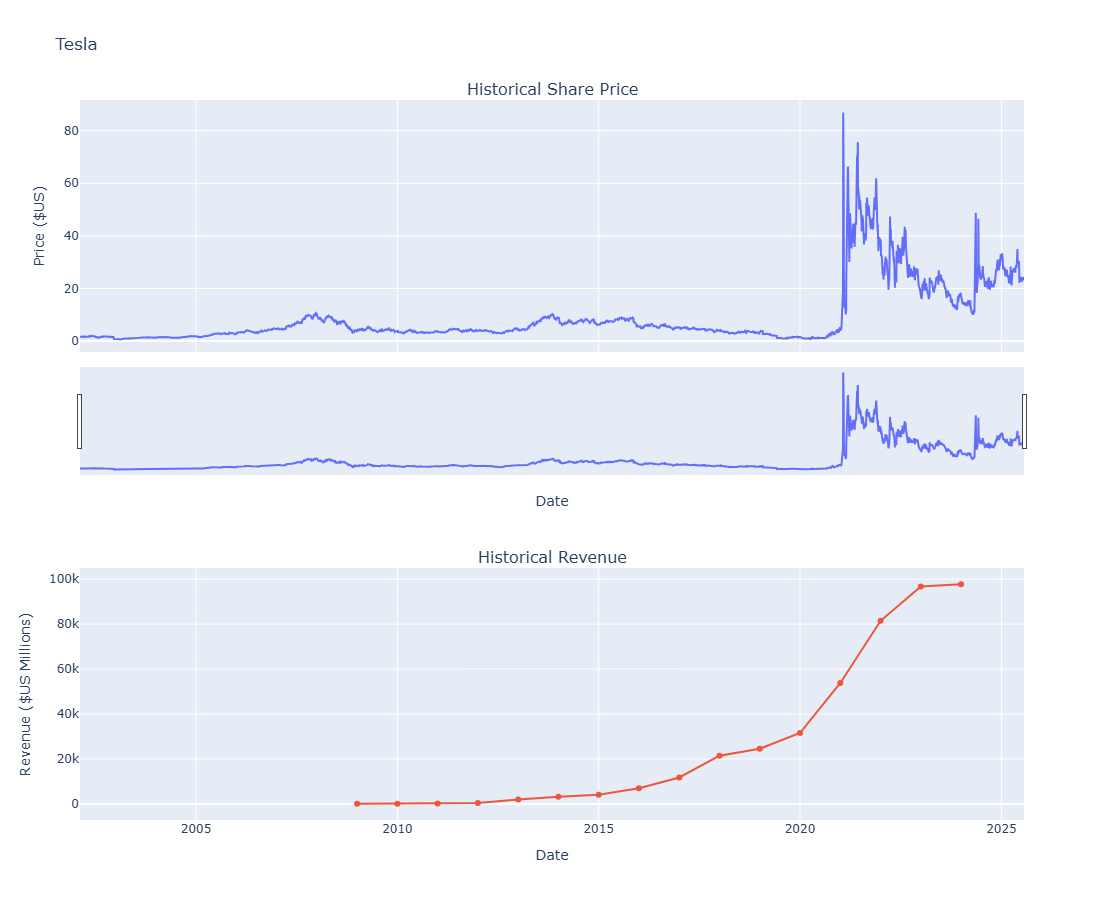

In [45]:
make_graph(Tesla_dat, Tesla_revenue, 'Tesla')

## GameStop Stock and Revenue Dashboard

C:\Users\haste\AppData\Local\Temp\ipykernel_14164\3899174361.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\haste\AppData\Local\Temp\ipykernel_14164\3899174361.py:7: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



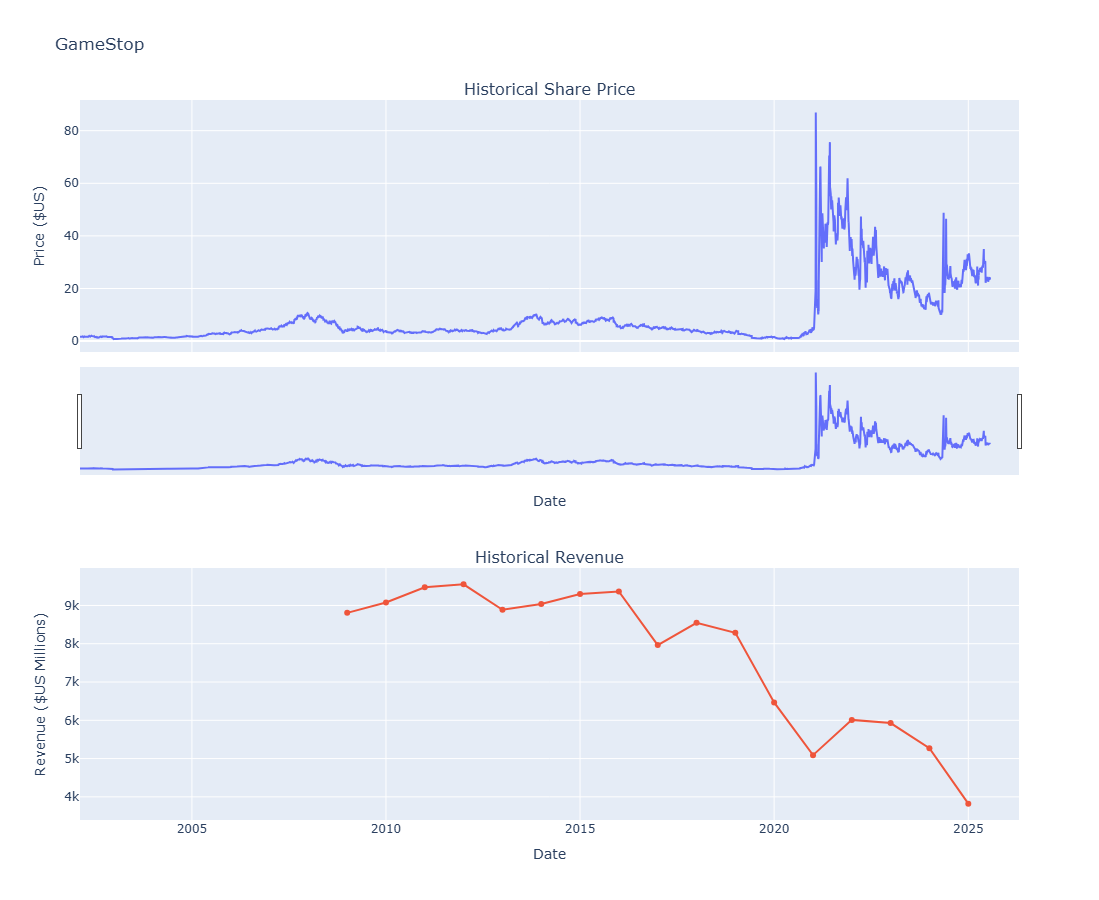

In [50]:
make_graph(Gamestop_dat, Gamestop_revenue, 'GameStop')